# Discrete solitons, twin soliton, compute entanglement vs N

We use a variational ansatz via pullback in the representation
of the characteristic function in the quantum phase space


<img src="../logo_circular.png" width="20" height="20" />@by claudio<br>
<br>nonlinearxwaves@gmail.com<br>
@created 31 July 2021<br>
@version 2 October 2023<br>

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # disable warning messages 

## Disable GPU

In [2]:
import os

In [3]:
DisableGPU=True
if DisableGPU:
    try:
        # Disable all GPUS        
        os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
        #tf.config.set_visible_devices([], 'GPU')
        #visible_devices = tf.config.get_visible_devices()
        #for device in visible_devices:
        #    assert device.device_type != 'GPU'
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass
else:
    print("Nothing to be done")

## Import and setup

In [4]:
import sys
sys.path.append('../../')
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from thqml import phasespace as qx
from thqml import quantumsolitons as qs
import random

#### Default precision (tr_real and np_real as tf.float32 np.float32 or tf.float64 np.floatt)

In [5]:
tf_real = tf.float32
np_real = np.float32

In [6]:
np.set_printoptions(precision=4)

#### Check GPU

In [7]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


# Parameters

In [8]:
max_number_epochs=10000

In [9]:
period_display_epoch=max_number_epochs/10

In [10]:
period_checkpoint_epoch=period_display_epoch

In [11]:
BosonSampling=True

In [12]:
# index of pair modes
nA=4
nB=5

## Target total number of bosons

In [13]:
Nmin=20 # minimal value of N
Nmax=110 # maximal value of N
Nstep=10 # step in N

## Dimension (initial minimal value)

In [14]:
N=20

### Number of modes

In [15]:
n=int(N/2)

## Value for potential

In [16]:
chi=-1

# Init the quantum soliton python module

In [17]:
# bose hubbard model has L=n and U=chi
qs.init({"n":n,"dtype":tf_real,"chi":chi,"L":n,"model":"nnt"})

Setting Bose-Hubbard model L=n (non periodical)


## Compute negativity by training for various N

In [18]:
ENeg_list=[]
N_values=[]
for indexn in range(Nmin,Nmax,Nstep):
    tf.keras.backend.clear_session()
    print('----------------------- Processing N = '+repr(indexn))
    ENeg, twin_model = qs.twin_solitons_entanglement(nA,nB,indexn,nepochs=max_number_epochs)
    print('EN = '+repr(ENeg))
    ENeg_list.append(ENeg)
    N_values.append(indexn)


----------------------- Processing N = 20
Training model for epochs 10000 ...
Initial loss 396.4403991699219
  Final loss 0.005074984859675169
Number of total bosons after training 20.000635 ...
 ################################### 
EN = 2.00621265883715
----------------------- Processing N = 30
Training model for epochs 10000 ...
Initial loss 894.3579711914062
  Final loss 0.0008127509499900043
Number of total bosons after training 30.000086 ...
 ################################### 
EN = 3.042239508506469
----------------------- Processing N = 40
Training model for epochs 10000 ...
Initial loss 1592.2957763671875
  Final loss 0.00014512107009068131
Number of total bosons after training 40.000027 ...
 ################################### 
EN = 3.43785800246244
----------------------- Processing N = 50
Training model for epochs 10000 ...
Initial loss 2489.99169921875
  Final loss 2.7704418243956752e-05
Number of total bosons after training 50.000015 ...
 #################################

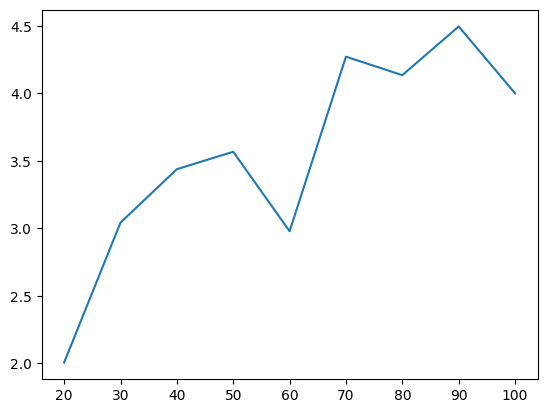

In [29]:
plt.plot(N_values,ENeg_list)

## Save data 

In [20]:
root_path='./'
claudio_arrays_file=root_path+'dataBHT/manyN/data_Nmin'+repr(Nmin)+'_Nmax'+repr(Nmax)+'_Nstep'+repr(Nstep)+'_N'+repr(N)+'_A'+repr(nA)+'_B'+repr(nB)+'_epochs'+repr(max_number_epochs)+'/claudioarrays'
claudio_weights_file=root_path+'dataBHT/manyN/data_Nmin'+repr(Nmin)+'_Nmax'+repr(Nmax)+'_Nstep'+repr(Nstep)+'_N'+repr(N)+'_A'+repr(nA)+'_B'+repr(nB)+'_epochs'+repr(max_number_epochs)+'/claudiomodel'

In [21]:
claudio_arrays_file

'./dataBHT/manyN/data_Nmin20_Nmax110_Nstep10_N20_A4_B5_epochs10000/claudioarrays'

In [22]:
# Save file
twin_model.save_weights(claudio_weights_file)
np.savez(claudio_arrays_file,ENeg_list=ENeg_list,N_values=N_values,
         nA=nA, nB=nB,Nmin=Nmin,Nmax=Nmax,Nstep=Nstep, chi=chi, N=N, max_number_epochs=max_number_epochs)

In [23]:
def plot_nboson(twin_model):
    " Plot the boson profile in the model"
    xtrain = np.random.rand(1, N)-0.5
    results=twin_model(xtrain)
    plt.stem(results[0][0].numpy());


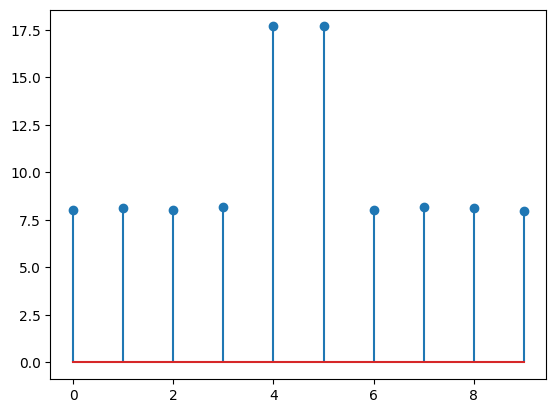

In [28]:
plot_nboson(twin_model)